# Example scripts to generate aperture and phase maskswith pyMOE 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from matplotlib import pyplot as plt 
import numpy as np 
import sys
sys.path.insert(0,'..')
import pyMOE as moe
from scipy.constants import micro, nano, milli

## First example: Circular aperture 

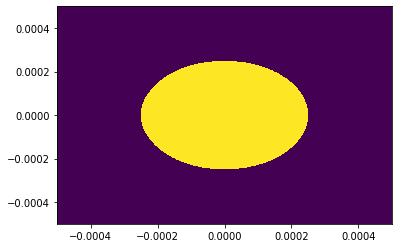

In [3]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)

# Create circular aperture on mask
center=(0*micro, 0*micro)
mask = moe.generate.circular_aperture(mask, radius=250*micro, )


# Accessing data inside mask class
amplitude = mask.aperture

x = mask.x
y = mask.y

XX = mask.XX
YY = mask.YY


plt.figure()
plt.pcolormesh(x,y,amplitude)

# Plotting using internal functions

In [4]:
mask

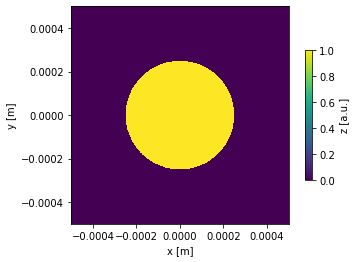

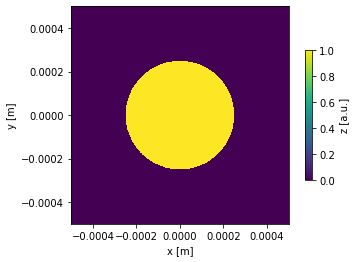

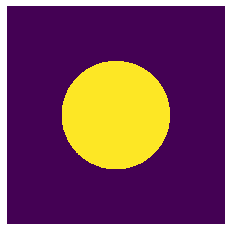

In [9]:

# Plot amplitude and phase
moe.plotting.plot_aperture(mask)

# Plot aperture
moe.plotting.plot_aperture(mask)

# Plot only plot
moe.plotting.plot_aperture(mask, only_plot=True)

In [11]:
type(mask)

pyMOE.aperture.Aperture

# Rectangular Aperture

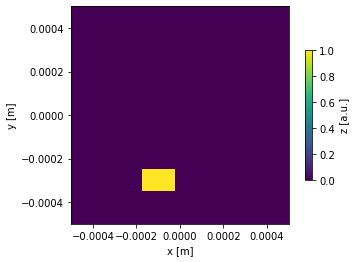

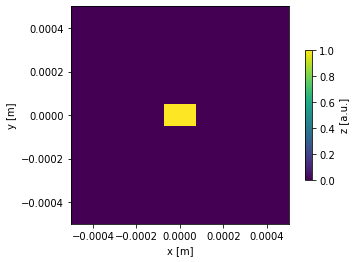

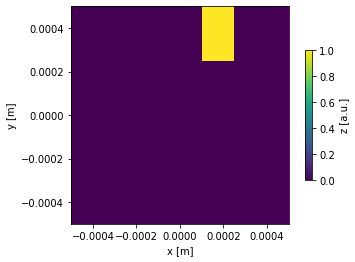

In [10]:

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)

# create rectangular mask
rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 100*micro, center=(-100*micro, -300*micro))
moe.plotting.plot_aperture(rectangle, )


rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 100*micro, )
moe.plotting.plot_aperture(rectangle, )

rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 500*micro, corner=(100*micro, 250*micro))
moe.plotting.plot_aperture(rectangle, )

## Fresnel Zone Plate

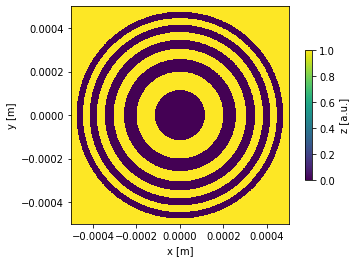

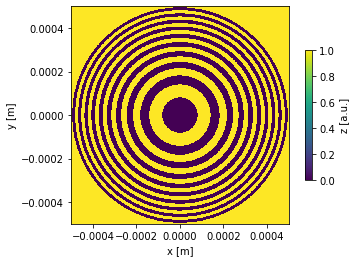

In [11]:

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_zone_plate_aperture(mask, 50*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )


# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=25mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_zone_plate_aperture(mask, 25*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )



# Fresnel phase mask

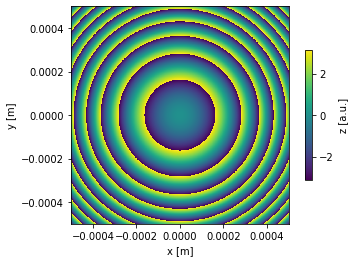

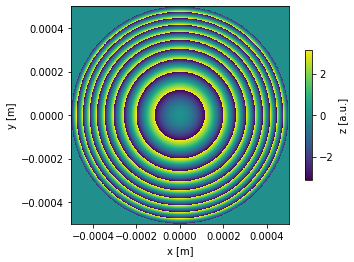

In [15]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, )
moe.plotting.plot_aperture(mask, )

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=25mm, lambda=532nm, R=500µm

# and truncate around radius
mask = moe.generate.fresnel_phase(mask, 25*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )

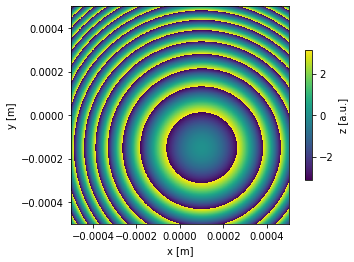

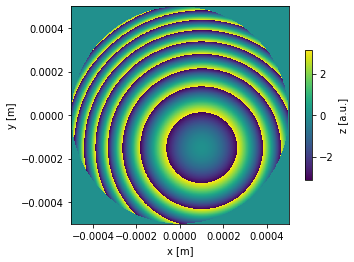

In [19]:
# offcenter fresnel phase mask
aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(100*micro, -150*micro)
aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.fresnel_lens_phase, center=center, focal_length=50*milli, wavelength=532*nano)

moe.plotting.plot_aperture(aperture)
# Truncate around (0,0)
aperture = moe.generate.truncate_aperture_radius(aperture, 500*micro, center=(0,0))



moe.plotting.plot_aperture(aperture)

## Spiral phase

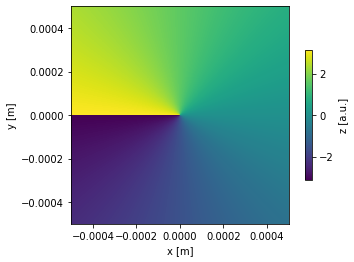

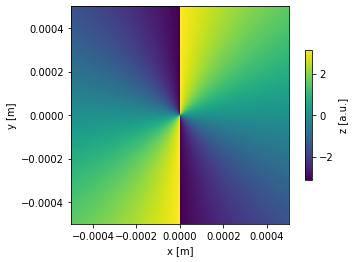

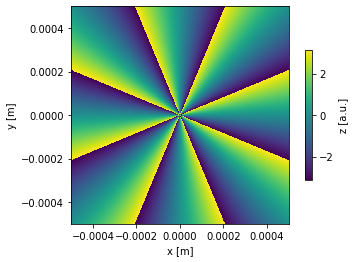

In [21]:



aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(0,0)
aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=1)
moe.plotting.plot_aperture(aperture)

aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=2)
moe.plotting.plot_aperture(aperture)

aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=8)
moe.plotting.plot_aperture(aperture)

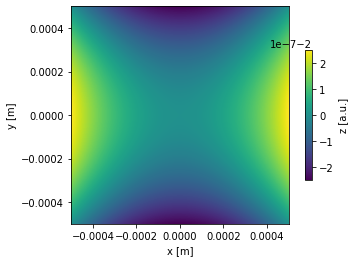

In [24]:
# Saddle function

aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(0,0)
aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.saddle, center=center, a=1,b=2)
moe.plotting.plot_aperture(aperture)


In [20]:
def convert_array_to_levels(array, levels, limits=[-np.pi,np.pi], output_limits=None, verbose=False):
    """Digitizes the given array to within the number of levels provided 
    
    Parameters
    ----------
    array : input array of values
    levels : number of levels to consider
    limits : the input data limits to consider for the interval calculation
    output_limits : if given, multiplies the digitized input to the output range
    
    Returns
    -------
    a : digitized output
    """
    min_limit = np.min(limits)
    array_range = np.max(limits)-min_limit
    interval = array_range/levels

    ranges = np.arange(1,levels)*interval+min_limit
    if verbose:
        print("ranges:", ranges)
    a = np.digitize(array, ranges)
    
    if output_limits is not None:
        min_limit = np.min(output_limits)
        array_range = np.max(output_limits)-min_limit
        interval = array_range/levels
    return a*interval+min_limit


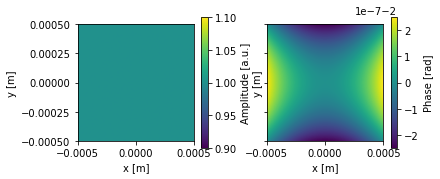

In [21]:
moe.plotting.plot_aperture(aperture)

TypeError: x may not be complex

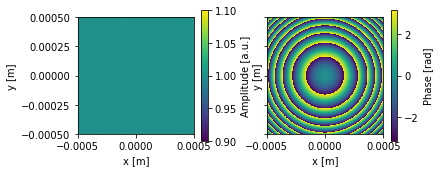

In [30]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, )
moe.plotting.plot_aperture(mask, )

discrete = convert_array_to_levels(aperture.phase, 3)

plt.imshow(discrete)

In [28]:
np.unique(discrete)

array([-3.14159265,  0.        ])